# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Matrices-(BV-Chapters-6-10)" data-toc-modified-id="Matrices-(BV-Chapters-6-10)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matrices (BV Chapters 6-10)</a></div><div class="lev2 toc-item"><a href="#Notations-and-terminology" data-toc-modified-id="Notations-and-terminology-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notations and terminology</a></div><div class="lev2 toc-item"><a href="#Some-special-matrices" data-toc-modified-id="Some-special-matrices-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Some special matrices</a></div><div class="lev2 toc-item"><a href="#Matrix-operations" data-toc-modified-id="Matrix-operations-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Matrix operations</a></div><div class="lev2 toc-item"><a href="#Matrix-matrix-and-matrix-vector-products" data-toc-modified-id="Matrix-matrix-and-matrix-vector-products-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Matrix-matrix and matrix-vector products</a></div><div class="lev2 toc-item"><a href="#Linear-functions" data-toc-modified-id="Linear-functions-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Linear functions</a></div><div class="lev3 toc-item"><a href="#Permutation" data-toc-modified-id="Permutation-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Permutation</a></div><div class="lev3 toc-item"><a href="#Rotation" data-toc-modified-id="Rotation-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Rotation</a></div><div class="lev3 toc-item"><a href="#Projection-and-reflection" data-toc-modified-id="Projection-and-reflection-153"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Projection and reflection</a></div><div class="lev3 toc-item"><a href="#Convolution" data-toc-modified-id="Convolution-154"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Convolution</a></div><div class="lev3 toc-item"><a href="#Vandermonde-matrix" data-toc-modified-id="Vandermonde-matrix-155"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>Vandermonde matrix</a></div><div class="lev2 toc-item"><a href="#Affine-matrix" data-toc-modified-id="Affine-matrix-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Affine matrix</a></div><div class="lev2 toc-item"><a href="#Computational-complexity" data-toc-modified-id="Computational-complexity-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Computational complexity</a></div>

In [1]:
using Pkg
Pkg.activate(pwd())

  Activating environment at `~/Documents/github.com/ucla-biostat216-2021fall.github.io/slides/03-matrix/Project.toml`


In [2]:
using DSP, GraphPlot, LightGraphs, LinearAlgebra, MatrixDepot, Polynomials
using Random, SpecialMatrices, Symbolics, UnicodePlots
Random.seed!(216)

include group.jl for user defined matrix generators
verify download of index files...
reading database
adding metadata...
adding svd data...
writing database
used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index


┌ Info: Precompiling Symbolics [0c5d862f-8b57-4792-8d23-62f2024744c7]
└ @ Base loading.jl:1317
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Symbolics [0c5d862f-8b57-4792-8d23-62f2024744c7]
│   exception = ErrorException("Required dependency RecursiveArrayTools [731186ca-8d62-57ce-b412-fbd966d074cd] failed to load from a cache file.")
└ @ Base loading.jl:1033


MersenneTwister(216)

# Matrices (BV Chapters 6-10)

## Notations and terminology

- A matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$
$$
\mathbf{A} = \begin{pmatrix}
a_{11} & \cdots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{m1} & \cdots & a_{mn}
\end{pmatrix}.
$$
    - $a_{ij}$ are the matrix **elements** or **entries** or **coefficients** or **components**.  
    - **Size** or **dimension** of the matrix is $m \times n$.  

- Many authors use square brackets:
$$
\mathbf{A} = \begin{bmatrix}
a_{11} & \cdots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{m1} & \cdots & a_{mn}
\end{bmatrix}.
$$

In [3]:
A = [0 1 -2.3 0.1;
    1.3 4 -0.1 0;
    4.1 -1 0 1.7]

3×4 Matrix{Float64}:
 0.0   1.0  -2.3  0.1
 1.3   4.0  -0.1  0.0
 4.1  -1.0   0.0  1.7

- We say a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ is
    - **tall** if $m > n$;
    - **wide** if $m < n$;
    - **square** if $m = n$

In [4]:
# a tall matrix
A = randn(3, 2)

3×2 Matrix{Float64}:
 -1.28506   -0.326449
 -1.44549    1.8623
 -0.244914   0.0582264

In [5]:
# a wide matrix
A = randn(2, 3)

2×3 Matrix{Float64}:
 -0.135717  -2.23444   0.854177
 -0.8972     0.915744  0.576381

In [6]:
# a square matrix
A = randn(3, 3)

3×3 Matrix{Float64}:
 -0.0627216   0.848249  0.336559
  0.668146   -0.358689  0.321647
 -0.0148676  -1.07614   0.183508

- **Block matrix** is a rectangular array of matrices
$$
\mathbf{A} = \begin{pmatrix}
\mathbf{B} & \mathbf{C} \\
\mathbf{D} & \mathbf{E}
\end{pmatrix}.
$$
Elements in the block matrices are the **blocks** or **submatrices**. Dimensions of the blocks must be compatible.

In [7]:
# blocks
B = [2; 1]
C = [0 2 3; 5 4 7]
D = [1]
E = [-1 6 0]
# block matrix
A = [B C; D E]

3×4 Matrix{Int64}:
 2   0  2  3
 1   5  4  7
 1  -1  6  0

- $\mathbf{A} \in \mathbb{R}^{m \times n}$ viewed as a $1 \times n$ block matrix with each column as a block
$$
\mathbf{A} = \begin{pmatrix}
\mathbf{a}_1 & \cdots & \mathbf{a}_n
\end{pmatrix},
$$
where 
$$
\mathbf{a}_j = \begin{pmatrix} a_{1j} \\ \vdots \\ a_{mj} \end{pmatrix}
$$
is the $j$-th column of $\mathbf{A}$.

- $\mathbf{A} \in \mathbb{R}^{m \times n}$ viewed as an $m \times 1$ block matrix with each row as a block
$$
\mathbf{A} = \begin{pmatrix}
\mathbf{b}_1' \\
\vdots \\
\mathbf{b}_m'
\end{pmatrix},
$$
where
$$
\mathbf{b}_i' = \begin{pmatrix} a_{i1}, \ldots, a_{in} \end{pmatrix}
$$
is the $i$-th row of $\mathbf{A}$.

## Some special matrices

- **Zero matrix** $\mathbf{0}_{m \times n} \in \mathbf{R}^{m \times n}$ is the matrix with all entries $a_{ij}=0$. The subscript is often omitted when the dimension is clear from context.

- **Identity matrix** $\mathbf{I}_n \in \mathbb{R}^{n \times n}$ has entries $a_{ij} = \delta_{ij}$ (Kronecker delta notation):
$$
\mathbf{I}_n = \begin{pmatrix} 1 & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & 1
\end{pmatrix}.
$$
The subscript is often omitted when the dimension is clear from context. The columns of $\mathbf{A}$ are the unit vectors
$$
\mathbf{I}_n = \begin{pmatrix} \mathbf{e}_1, \ldots, \mathbf{e}_n \end{pmatrix}.
$$
Identity matrix is called the **uniform scaling** in some computer languages.

In [8]:
# a 3x5 zero matrix
zeros(3, 5)

3×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [9]:
# a 3x3 identity matrix
I(3)

3×3 Diagonal{Bool, Vector{Bool}}:
 1  ⋅  ⋅
 ⋅  1  ⋅
 ⋅  ⋅  1

In [10]:
# convert to dense matrix
Matrix(I(3))

3×3 Matrix{Bool}:
 1  0  0
 0  1  0
 0  0  1

- **Symmetric matrix** is a square matrix $\mathbf{A}$ with $a_{ij} = a_{ji}$.

In [11]:
# a symmetric matrix
A = [4 3 -2; 3 -1 5; -2 5 0]

3×3 Matrix{Int64}:
  4   3  -2
  3  -1   5
 -2   5   0

In [12]:
issymmetric(A)

true

In [13]:
# turn a general square matrix into a symmetric matrix

In [14]:
A = randn(3, 3)

3×3 Matrix{Float64}:
 -1.46013     0.527643   1.06857
  0.0341577   0.277008  -1.38077
 -1.38244    -0.159054   1.90148

In [15]:
# use upper triangular part as data
Symmetric(A)

3×3 Symmetric{Float64, Matrix{Float64}}:
 -1.46013    0.527643   1.06857
  0.527643   0.277008  -1.38077
  1.06857   -1.38077    1.90148

- A **diagonal matrix** is a square matrix $\mathbf{A}$ with $a_{ij} = 0$ for all $i \ne j$.

In [16]:
# a diagonal matrix
A = [-1 0 0; 0 2 0; 0 0 -5]

3×3 Matrix{Int64}:
 -1  0   0
  0  2   0
  0  0  -5

In [17]:
# turn a general square matrix into a diagonal matrix
Diagonal(A)

3×3 Diagonal{Int64, Vector{Int64}}:
 -1  ⋅   ⋅
  ⋅  2   ⋅
  ⋅  ⋅  -5

- A **lower triangular matrix** is a square matrix $\mathbf{A}$ with $a_{ij} = 0$ for all $i < j$.

- A **upper triangular matrix** is a square matrix $\mathbf{A}$ with $a_{ij} = 0$ for all $i > j$.

In [18]:
# a lower triangular matrix
A = [4 0 0; 3 -1 0; -1 5 -2]

3×3 Matrix{Int64}:
  4   0   0
  3  -1   0
 -1   5  -2

In [19]:
# turn a general square matrix into a lower triangular matrix
A = randn(3, 3)
LowerTriangular(A)

3×3 LowerTriangular{Float64, Matrix{Float64}}:
  0.853046   ⋅         ⋅ 
 -0.555663  0.333068   ⋅ 
  0.794304  1.66378   0.0561321

In [20]:
# turn a general square matrix into an upper triangular matrix
UpperTriangular(A)

3×3 UpperTriangular{Float64, Matrix{Float64}}:
 0.853046  1.26949   -0.0676266
  ⋅        0.333068  -0.474861
  ⋅         ⋅         0.0561321

- A **unit lower triangular matrix** is a square matrix $\mathbf{A}$ with $a_{ij} = 0$ for all $i < j$ and $a_{ii}=1$.

- A **unit upper triangular matrix** is a square matrix $\mathbf{A}$ with $a_{ij} = 0$ for all $i > j$ and $a_{ii}=1.

In [21]:
# turn a general square matrix into a unit lower triangular matrix
UnitLowerTriangular(A)

3×3 UnitLowerTriangular{Float64, Matrix{Float64}}:
  1.0        ⋅        ⋅ 
 -0.555663  1.0       ⋅ 
  0.794304  1.66378  1.0

In [22]:
# turn a general square matrix into a unit upper triangular matrix
UnitUpperTriangular(A)

3×3 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  1.26949  -0.0676266
  ⋅   1.0      -0.474861
  ⋅    ⋅        1.0

- We say a matrix is **sparse** if most (almost all) of its elements are zero.

    - In computer, a sparse matrix only stores the non-zero entries and their positions. 
    
    - Special algorithms exploit the sparsity. Efficiency depends on number of nonzeros and their positions.
    
    - Sparse matrix can be visualized by the **spy plot**. 

In [23]:
mdinfo("SNAP/web-Google")

# SNAP/web-Google

###### MatrixMarket matrix coordinate pattern general

---

  * UF Sparse Matrix Collection, Tim Davis
  * http://www.cise.ufl.edu/research/sparse/matrices/SNAP/web-Google
  * name: SNAP/web-Google
  * [Web graph from Google]
  * id: 2301
  * date: 2002
  * author: Google
  * ed: J. Leskovec
  * fields: name title A id date author ed kind notes
  * kind: directed graph

---

  * notes:
  * Networks from SNAP (Stanford Network Analysis Platform) Network Data Sets,
  * Jure Leskovec http://snap.stanford.edu/data/index.html
  * email jure at cs.stanford.edu
  * 
  * Google web graph
  * 
  * Dataset information
  * 
  * Nodes represent web pages and directed edges represent hyperlinks between them.
  * The data was released in 2002 by Google as a part of Google Programming
  * Contest.
  * 
  * Dataset statistics
  * Nodes   875713
  * Edges   5105039
  * Nodes in largest WCC    855802 (0.977)
  * Edges in largest WCC    5066842 (0.993)
  * Nodes in largest SCC    434818 (0.497)
  * Edges in largest SCC    3419124 (0.670)
  * Average clustering coefficient  0.6047
  * Number of triangles     13391903
  * Fraction of closed triangles    0.05523
  * Diameter (longest shortest path)    22
  * 90-percentile effective diameter    8.1
  * 
  * Source (citation)
  * 
  * J. Leskovec, K. Lang, A. Dasgupta, M. Mahoney. Community Structure in Large
  * Networks: Natural Cluster Sizes and the Absence of Large Well-Defined Clusters.
  * arXiv.org:0810.1355, 2008.
  * 
  * Google programming contest, 2002
  * http://www.google.com/programming-contest/
  * 
  * Files
  * File    Description
  * web-Google.txt.gz   Webgraph from the Google programming contest, 2002

---

916428 916428 5105039


In [24]:
md = mdopen("SNAP/web-Google")
@show size(md.A)
md.A

size(md.A) = (916428, 916428)


916428×916428 SparseArrays.SparseMatrixCSC{Bool, Int64} with 5105039 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

In [25]:
# show contents of SparseMatrixCSC{Bool, Int64}
dump(md.A)

SparseArrays.SparseMatrixCSC{Bool, Int64}
  m: Int64 916428
  n: Int64 916428
  colptr: Array{Int64}((916429,)) [1, 213, 219, 263, 266, 271, 286, 286, 289, 290  …  5104956, 5104963, 5104977, 5104979, 5104979, 5104993, 5104994, 5104994, 5105038, 5105040]
  rowval: Array{Int64}((5105039,)) [11343, 11928, 15902, 29547, 30282, 31301, 38717, 43930, 46275, 48193  …  673046, 716616, 720325, 772226, 785097, 788476, 822938, 833616, 417498, 843845]
  nzval: Array{Bool}((5105039,)) Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Matrix operations

- **Scalar-matrix multiplication**: For $\beta \in \mathbb{R}$ and $\mathbf{A} \in \mathbb{R}^{m \times n}$,
$$
\beta \mathbf{A} = \begin{pmatrix}
\beta a_{11} & \cdots & \beta a_{1n} \\
\vdots & \ddots & \vdots \\
\beta a_{m1} & \cdots & \beta a_{mn}
\end{pmatrix}.
$$

In [26]:
β = 0.5
A = [0 1 -2.3 0.1;
    1.3 4 -0.1 0;
    4.1 -1 0 1.7]

3×4 Matrix{Float64}:
 0.0   1.0  -2.3  0.1
 1.3   4.0  -0.1  0.0
 4.1  -1.0   0.0  1.7

In [27]:
β * A

3×4 Matrix{Float64}:
 0.0    0.5  -1.15  0.05
 0.65   2.0  -0.05  0.0
 2.05  -0.5   0.0   0.85

- **Matrix addition and substraction**: For $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{m \times n}$,
$$
\mathbf{A} + \mathbf{B} = \begin{pmatrix}
a_{11} + b_{11} & \cdots & a_{1n} + b_{1n} \\
\vdots & \ddots & \vdots \\
a_{m1} + b_{m1} & \cdots & a_{mn} + b_{mn}
\end{pmatrix}, \quad \mathbf{A} - \mathbf{B} = \begin{pmatrix}
a_{11} - b_{11} & \cdots & a_{1n} - b_{1n} \\
\vdots & \ddots & \vdots \\
a_{m1} - b_{m1} & \cdots & a_{mn} - b_{mn}
\end{pmatrix}.
$$ 

In [28]:
A = [0 1 -2.3 0.1;
    1.3 4 -0.1 0;
    4.1 -1 0 1.7]
B = ones(size(A))

3×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [29]:
A + B

3×4 Matrix{Float64}:
 1.0  2.0  -1.3  1.1
 2.3  5.0   0.9  1.0
 5.1  0.0   1.0  2.7

In [30]:
A - B

3×4 Matrix{Float64}:
 -1.0   0.0  -3.3  -0.9
  0.3   3.0  -1.1  -1.0
  3.1  -2.0  -1.0   0.7

- The **transpose** of a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ is the $n \times n$ matrix
$$
\mathbf{A}' = \begin{pmatrix}
a_{11} & \cdots & a_{m1} \\
\vdots & \ddots & \vdots \\
a_{1n} & \cdots & a_{mn}
\end{pmatrix}.
$$
Alternative notation: $\mathbf{A}^T$, $\mathbf{A}^t$.

    - A symmetric matrix satisfies $\mathbf{A} = \mathbf{A}'$.

    - $(\beta \mathbf{A})' = \beta \mathbf{A}'$.

    - $(\mathbf{A} + \mathbf{B})' = \mathbf{A}' + \mathbf{B}'$.

In [31]:
A'

4×3 adjoint(::Matrix{Float64}) with eltype Float64:
  0.0   1.3   4.1
  1.0   4.0  -1.0
 -2.3  -0.1   0.0
  0.1   0.0   1.7

## Matrix-matrix and matrix-vector products

- **Matrix-matrix multiplication** or **matrix-matrix product**: For $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{B} \in \mathbb{R}^{n \times p}$,
$$
\mathbf{C} = \mathbf{A} \mathbf{B}
$$
is the $m \times p$ matrix with entries
$$
c_{ij} = a_{i1} b_{1j} + a_{i2} b_{2k} + \cdots + a_{in} b_{nj}.
$$
Note the number of columns in $\mathbf{A}$ must be equal to the number of rows in $\mathbf{B}$.

- Vector inner product $\mathbf{a}' \mathbf{b}$ is a special case of matrix-matrix multiplication with $m=p=1$.

- View of matrix-matrix multiplication as inner products. $c_{ij}$ is the inner product of the $i$-th row of $\mathbf{A}$ and the $j$-th column of $\mathbf{B}$:
$$
\begin{pmatrix}
& & \\
& c_{ij} & \\
& & 
\end{pmatrix} = \begin{pmatrix}
& & \\
- & \mathbf{a}_i' & - \\
& &
\end{pmatrix} \begin{pmatrix}
& | & \\
& \mathbf{b}_j & \\
& | &
\end{pmatrix}.
$$

In [32]:
m, n, p = 3, 2, 4
A = randn(m, n)

3×2 Matrix{Float64}:
  0.0104737  -0.904305
 -0.254432    0.369159
 -0.529029    0.519145

In [33]:
B = randn(n, p)

2×4 Matrix{Float64}:
  0.0366214  0.0669796   0.0865552   1.74975
 -0.516973   0.0965049  -0.430237   -0.129446

In [34]:
C = A * B

3×4 Matrix{Float64}:
  0.467885  -0.0865683   0.389972   0.135385
 -0.200163   0.0185839  -0.180848  -0.492978
 -0.287757   0.0146658  -0.269145  -0.992868

In [35]:
# check C[2,3] = A[2,:]'B[:,3]
C[2, 3] ≈ A[2, :]'B[:, 3]

true

- **Matrix-vector multiplication** or **matrix-vector product** are special cases of the matrix-matrix multiplication with $m=1$ or $p=1$. 

    - For $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^{n}$,
$$
\mathbf{A} \mathbf{b} = \begin{pmatrix}
- & \mathbf{a}_1' & - \\
& \vdots & \\
- & \mathbf{a}_m' & - 
\end{pmatrix} \mathbf{b} = \begin{pmatrix} \mathbf{a}_1' \mathbf{b} \\ \vdots \\ \mathbf{a}_m' \mathbf{b} \end{pmatrix} \in \mathbb{R}^m.
$$
Alternatively, $\mathbf{A} \mathbf{b}$ can be viewed as a linear combination of columns of $\mathbf{A}$
$$
\mathbf{A} \mathbf{b} = \begin{pmatrix}
| & & | \\
\mathbf{a}_1 & & \mathbf{a}_n \\
| & & |
\end{pmatrix} \begin{pmatrix} b_1 \\ \vdots \\ b_n \end{pmatrix} = b_1 \mathbf{a}_1 + \cdots b_n \mathbf{a}_n.
$$

    - For $\mathbf{a} \in \mathbb{R}^n$ and $\mathbf{B} \in \mathbb{R}^{n \times p}$,
$$
\mathbf{a}' \mathbf{B} = \mathbf{a}' \begin{pmatrix}
| & & | \\
\mathbf{b}_1 & & \mathbf{b}_p \\
| & & |
\end{pmatrix} = (\mathbf{a}' \mathbf{b}_1, \ldots, \mathbf{a}'\mathbf{b}_p).
$$
Alternatively, $\mathbf{a}' \mathbf{B}$ can be viewed as a linear combination of the rows of $\mathbf{B}$
$$
\mathbf{a}' \mathbf{B} = (a_1, \ldots, a_m) \begin{pmatrix}
- & \mathbf{b}_1' & - \\
& & \\
- & \mathbf{b}_m' & -
\end{pmatrix} = a_1 \mathbf{b}_1' + \cdots + a_m \mathbf{b}_m'.
$$

- View of matrix mulplication $\mathbf{C} = \mathbf{A} \mathbf{B}$ as matrix-vector products. 
    
    - $j$-th column of $\mathbf{C}$ is equal to product of $\mathbf{A}$ and $j$-th column of $\mathbf{B}$
$$
\begin{pmatrix}
& | & \\
& \mathbf{c}_j & \\
& | & 
\end{pmatrix} = \mathbf{A} \begin{pmatrix}
& | & \\
& \mathbf{b}_j & \\
& | & 
\end{pmatrix}.
$$

    - $i$-th row of $\mathbf{C}$ is equal to product of $i$-th row of $\mathbf{A}$ and $\mathbf{B}$
$$
\begin{pmatrix}
& & \\
- & \mathbf{c}_i' & - \\
& & 
\end{pmatrix} = \begin{pmatrix}
& & \\
- & \mathbf{a}_i' & - \\
& & 
\end{pmatrix} \mathbf{B}.
$$

In [36]:
# check C[:, 2] = A * B[:, 2]
C[:, 2] ≈ A * B[:, 2]

true

In [37]:
# check C[2, :]' = A[2, :]' * B
# note C[2, :] returns a column vector in Julia!
C[2, :]' ≈ A[2, :]'B

true

**Exercise** 

Here is a directed graph with 4 nodes and 5 edges.

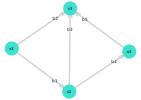

In [38]:
# a simple directed graph on GS p16
g = SimpleDiGraph(4)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
add_edge!(g, 2, 3)
add_edge!(g, 2, 4)
add_edge!(g, 4, 3)
gplot(g, nodelabel=["x1", "x2", "x3", "x4"], edgelabel=["b1", "b2", "b3", "b4", "b5"])

The adjacency matrix $\mathbf{A}$ has entries
\begin{eqnarray*}
    a_{ij} = \begin{cases}
    1 & \text{if node $i$ links to node $j$} \\
    0 & \text{otherwise}
    \end{cases}.
\end{eqnarray*}

In [39]:
# adjacency matrix A
A = convert(Matrix{Int64}, adjacency_matrix(g))

4×4 Matrix{Int64}:
 0  1  1  0
 0  0  1  1
 0  0  0  0
 0  0  1  0

Give a graph interpretation of $\mathbf{A}^2 = \mathbf{A} \mathbf{A}$, $\mathbf{A}^3 = \mathbf{A} \mathbf{A} \mathbf{A}$, ...

In [40]:
A * A

4×4 Matrix{Int64}:
 0  0  1  1
 0  0  1  0
 0  0  0  0
 0  0  0  0

In [41]:
A * A * A

4×4 Matrix{Int64}:
 0  0  1  0
 0  0  0  0
 0  0  0  0
 0  0  0  0

- Properties of matrix multiplications.

    - Associative: 
$$
(\mathbf{A} \mathbf{B}) \mathbf{C} = \mathbf{A} (\mathbf{B} \mathbf{C}) = \mathbf{A} \mathbf{B} \mathbf{C}.
$$
    - Associative with scalar-matrix multiplication: 
$$
(\alpha \mathbf{B}) \mathbf{C} = \mathbf{B} (\alpha \mathbf{C}) = \alpha \mathbf{B} \mathbf{C}.
$$
    - Distributive with sum: 
$$
(\mathbf{A} + \mathbf{B}) \mathbf{C} = \mathbf{A} \mathbf{C} + \mathbf{B} \mathbf{C}, \quad \mathbf{A} (\mathbf{B} + \mathbf{C}) = \mathbf{A} \mathbf{B} + \mathbf{A} \mathbf{C}.
$$
    - Transpose of product:
$$
(\mathbf{A} \mathbf{B})' = \mathbf{B}' \mathbf{A}'.
$$
    - **Not** communtative: 
$$
\mathbf{A} \mathbf{B} \ne \mathbf{B} \mathbf{A}
$$
in general. There are exceptions, e.g., $\mathbf{A} \mathbf{I} = \mathbf{I} \mathbf{A}$ for square $\mathbf{A}$.

In [42]:
A = randn(3, 2)
B = randn(2, 4)
A * B

3×4 Matrix{Float64}:
 -3.04316  0.010376   -1.02744    2.24375
 -3.20753  0.767453    4.2988    -2.52222
  1.45762  0.0344608   0.772632  -1.32945

In [43]:
# dimensions are even incompatible!
B * A

LoadError: DimensionMismatch("A has dimensions (2,4) but B has dimensions (3,2)")

- Matrix-matrix product in block form:
$$
\begin{pmatrix} \mathbf{A} & \mathbf{B} \\ \mathbf{C} & \mathbf{D} \end{pmatrix} \begin{pmatrix} \mathbf{W} & \mathbf{Y} \\ \mathbf{X} & \mathbf{Z} \end{pmatrix} = \begin{pmatrix} \mathbf{A} \mathbf{W} + \mathbf{B} \mathbf{X} & \mathbf{A} \mathbf{Y} + \mathbf{B} \mathbf{Z} \\ \mathbf{C} \mathbf{W} + \mathbf{D} \mathbf{X} & \mathbf{C} \mathbf{Y} + \mathbf{D} \mathbf{Z} \end{pmatrix}.
$$

In [44]:
# example

## Linear functions

- A function $f: \mathbb{R}^n \mapsto \mathbb{R}^m$ is **linear** if 
$$
f(\alpha \mathbf{x} + \beta \mathbf{y}) = \alpha f(\mathbf{x}) + \beta f(\mathbf{y}).
$$
for all scalars $\alpha, \beta$ and vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$.

- Definition linear function implies that the superposition property holds for any linear combination
$$
f(\alpha_1 \mathbf{x}_1 + \cdots + \alpha_p \mathbf{x}_p) = \alpha_1 f(\mathbf{x}_1) + \cdots + \alpha_p f(\mathbf{x}_p).
$$

- For a fixed matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$, the function $f: \mathbb{R}^m \mapsto \mathbb{R}^m$ defined by
$$
f(\mathbf{x}) = \mathbf{A} \mathbf{x}
$$
is linear, because $f(\alpha \mathbf{x} + \beta \mathbf{y}) = \mathbf{A} (\alpha \mathbf{x} + \beta \mathbf{y}) = \alpha \mathbf{A} \mathbf{x} + \beta \mathbf{A} \mathbf{y} = \alpha f(\mathbf{x}) + \beta f(\mathbf{y})$.

- Many linear functions can be interpreted as operators on the input vector $\mathbf{x} \in \mathbb{R}^n$.

### Permutation

- **Reverser matrix**:
$$
A = \begin{pmatrix}
0 & \cdots & 1 \\
\vdots & .^{.^{.}} & \vdots \\
1 & \cdots & 0
\end{pmatrix}, \quad \mathbf{A} \mathbf{x} = \begin{pmatrix} x_n \\ x_{n-1} \\ \vdots \\ x_2 \\ x_1 \end{pmatrix}.
$$

In [45]:
n = 5
A = [i + j == n + 1 ? 1 : 0 for i in 1:n, j in 1:n]

5×5 Matrix{Int64}:
 0  0  0  0  1
 0  0  0  1  0
 0  0  1  0  0
 0  1  0  0  0
 1  0  0  0  0

In [46]:
x = Vector(1:n)

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [47]:
A * x

5-element Vector{Int64}:
 5
 4
 3
 2
 1

- **Circular shift matrix**
$$
\mathbf{A} = \begin{pmatrix}
0 & 0 & \cdots & 0 & 1 \\
1 & 0 & \cdots & 0 & 0 \\
0 & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & 1 & 0
\end{pmatrix}, \quad \mathbf{A} \mathbf{x} = \begin{pmatrix} x_n \\ x_1 \\ x_2 \\ \vdots \\ x_{n-1} \end{pmatrix}.
$$

In [48]:
A = [mod(i - j, n) == 1 ? 1 : 0 for i in 1:n, j in 1:n]

5×5 Matrix{Int64}:
 0  0  0  0  1
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0

In [49]:
A * x

5-element Vector{Int64}:
 5
 1
 2
 3
 4

- The reverser and circular shift matrices are examples of permutation matrix. A **permutation matrix** is a square 0-1 matrix with one element 1 in each row and one element 1 in each column. 

    Equivalently, a permutation matrix is the identity matrix with columns reordered. 
    
    Equivalently, a permutation matrix is the identity matrix with rows reordered. 
    
    $\mathbf{A} \mathbf{x}$ is a permutation of elements in $\mathbf{x}$.

In [50]:
σ = randperm(n)

5-element Vector{Int64}:
 4
 3
 5
 1
 2

In [51]:
# permute the rows of identity matrix
P = I(n)[σ, :]

5×5 SparseArrays.SparseMatrixCSC{Bool, Int64} with 5 stored entries:
 ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅

In [52]:
# operator
P * x

5-element Vector{Int64}:
 4
 3
 5
 1
 2

In [53]:
x[σ]

5-element Vector{Int64}:
 4
 3
 5
 1
 2

### Rotation

- A **rotation matrix** in the plane:
$$
\mathbf{A} = \begin{pmatrix}
\cos \theta & - \sin \theta \\
\sin \theta & \cos \theta
\end{pmatrix}.
$$
$\mathbf{A} \mathbf{x}$ is $\mathbf{x}$ rotated counterclockwise over an angle $\theta$.

TODO: Picture.

In [54]:
θ = π/4
A = [cos(θ) -sin(θ); sin(θ) cos(θ)]

2×2 Matrix{Float64}:
 0.707107  -0.707107
 0.707107   0.707107

In [55]:
# rotate counterclockwise 45 degree
A * [2; 0]

2-element Vector{Float64}:
 1.4142135623730951
 1.414213562373095

In [56]:
# rotate counterclockwise 90 degree
A * (A * [2; 0])

2-element Vector{Float64}:
 4.440892098500626e-16
 2.0

- **Exercise**: Given two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^2$ of same length, how do we find a rotation matrix such that $\mathbf{A} \mathbf{x} = \mathbf{y}$?

In [57]:
x, y = randn(2), randn(2)
x = x / norm(x)
y = y / norm(y)
cosθ = x'y / (norm(x) * norm(y))

-0.9475486242948546

In [58]:
sinθ = sqrt(1 - cosθ^2)
A = [cosθ -sinθ; sinθ cosθ]

2×2 Matrix{Float64}:
 -0.947549  -0.319612
  0.319612  -0.947549

In [59]:
A * x ≈ y

true

### Projection and reflection

- **Projection** on the line through $\mathbf{a}$. TODO: Picture.
$$
\mathbf{y} = \frac{\mathbf{a}'\mathbf{x}}{\|\mathbf{a}\|^2} \mathbf{a} = \mathbf{A} \mathbf{x},
$$
where
$$
\mathbf{A} = \frac{1}{\|\mathbf{a}\|^2} \mathbf{a} \mathbf{a}'.
$$

In [60]:
# TODO

- **Reflection** with respect to the line through $\mathbf{a}$. TODO: Picture.
$$
\mathbf{z} = \mathbf{x} + 2(\mathbf{y} - \mathbf{x}) = \mathbf{B} \mathbf{x},
$$
with
$$
\mathbf{B} = \frac{2}{\|\mathbf{a}\|^2} \mathbf{a} \mathbf{a}' - \mathbf{I}.
$$

In [61]:
# TODO

- For a directed graph with $m$ nodes and $n$ arcs (directed edges), the **node-arc indicence matrix** $\mathbf{B} \in \{-1,0,1\}^{m \times n}$ has entries
\begin{eqnarray*}
    b_{ij} = \begin{cases}
    -1 & \text{if edge $j$ starts at vertex $i$} \\
    1 & \text{if edge $j$ ends at vertex $i$} \\
    0 & \text{otherwise}
    \end{cases}.
\end{eqnarray*}


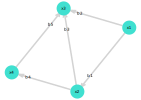

In [62]:
# a simple directed graph on GS p16
g = SimpleDiGraph(4)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
add_edge!(g, 2, 3)
add_edge!(g, 2, 4)
add_edge!(g, 4, 3)
gplot(g, nodelabel=["x1", "x2", "x3", "x4"], edgelabel=["b1", "b2", "b3", "b4", "b5"])

In [63]:
# incidence matrix B
B = convert(Matrix{Int64}, incidence_matrix(g))

4×5 Matrix{Int64}:
 -1  -1   0   0   0
  1   0  -1  -1   0
  0   1   1   0   1
  0   0   0   1  -1

- **Kirchhoff's current law**: Let $\mathbf{x}=(x_1, \ldots, x_n)'$ with $x_j$ the current through arc $j$,
$$
(\mathbf{B} \mathbf{x})_i = \sum_{\text{arc $j$ enters node $i$}} x_j - \sum_{\text{arc $j$ leaves node $i$}} x_j = \text{total current arriving at node $i$}.
$$

In [64]:
@variables x1 x2 x3 x4 x5
B * [x1, x2, x3, x4, x5]

4-element Vector{Num}:
     -x1 - x2
 x1 - x3 - x4
 x2 + x3 + x5
      x4 - x5

- **Kirchhoff's voltage law**: For $\mathbf{y} = (y_1, \ldots, y_m)'$ with $y_i$ the potential at node $i$,
$$
(\mathbf{B}' \mathbf{y})_j = y_k - y_l \text{ if edge $j$ goes from node $l$ to node $k$ = negative of the voltage across arc $j$}.
$$

In [65]:
@variables y1 y2 y3 y4
B' * [y1, y2, y3, y4]

5-element Vector{Num}:
 y2 - y1
 y3 - y1
 y3 - y2
 y4 - y2
 y3 - y4

### Convolution

- The **convolution** of $\mathbf{a} \in \mathbb{R}^n$ and $\mathbf{b} \in \mathbb{R}^m$ is a vector $\mathbf{c} \in \mathbb{R}^{n+m-1}$ with entries
$$
c_k = \sum_{i+j=k+1} a_i b_j.
$$
Notation: $\mathbf{c} = \mathbf{a} * \mathbf{b}$. Example: $n=4$, $m=3$,
\begin{eqnarray*}
c_1 &=& a_1 b_1 \\
c_2 &=& a_1 b_2 + a_2 b_1 \\
c_3 &=& a_1 b_3 + a_2 b_2 + a_3 b_1 \\
c_4 &=& a_2 b_3 + a_3 b_2 + a_4 b_1 \\
c_5 &=& a_3 b_3 + a_4 b_2 \\
c_6 &=& a_4 b_3
\end{eqnarray*}

- Interpretation: Let $\mathbf{a}$ and $\mathbf{b}$ be the coefficients in polynomials
\begin{eqnarray*}
p(x) &=& a_1 + a_2 x + \cdots + a_n x^{n-1} \\
q(x) &=& b_1 + b_2 x + \cdots + b_m x^{m-1},
\end{eqnarray*}
then $\mathbf{c} = \mathbf{a} * \mathbf{b}$ gives the coefficients of the product polynomial
$$
p(x) q(x) = c_1 + c_2 x + \cdots + c_{n+m-1} x^{m+n-2}.
$$

In [66]:
n, m = 4, 3
@variables a[1:n] b[1:m]

2-element Vector{Symbolics.Arr{Num, 1}}:
 a[1:4]
 b[1:3]

In [67]:
p = Polynomial(a)

Polynomial(a[1] + a[2]*x + a[3]*x^2 + a[4]*x^3)

In [68]:
q = Polynomial(b)

Polynomial(b[1] + b[2]*x + b[3]*x^2)

In [69]:
p * q

Polynomial(a[1]*b[1] + a[1]*b[2] + a[2]*b[1]*x + a[3]*b[1] + a[1]*b[3] + a[2]*b[2]*x^2 + a[4]*b[1] + a[3]*b[2] + a[2]*b[3]*x^3 + a[4]*b[2] + a[3]*b[3]*x^4 + a[4]*b[3]*x^5)

In [70]:
coeffs(p * q)

6-element Vector{Num}:
                         a[1]*b[1]
             a[1]*b[2] + a[2]*b[1]
 a[3]*b[1] + a[1]*b[3] + a[2]*b[2]
 a[4]*b[1] + a[3]*b[2] + a[2]*b[3]
             a[4]*b[2] + a[3]*b[3]
                         a[4]*b[3]

- Probabilistic interpretation. In probability and statistics, convolution often appears when computing the distribution of the sum of two independent random variables. Let $X$ be a discrete random variable taking value $x \in \{0,1,\ldots,n-1\}$ with probability $p_x$ and $Y$ be another discrete random variable taking values $y \in \{0,1,\ldots,m-1\}$. Assume $X$ is independent of $Y$, then the distribution of $Z = X+Y$ is 
$$
\mathbb{P}(Z = k + 1) = ...
$$

In [71]:
# TODO: X ∼ Bin(n-1, p), Y ∼ Unif(0, m-1)

- Propoerties of convolution

    - symmetric: $\mathbf{a} * \mathbf{b} = \mathbf{b} * \mathbf{a}$. 
    - associative: $(\mathbf{a} * \mathbf{b}) * \mathbf{c} = \mathbf{a} * (\mathbf{b} * \mathbf{c})$. 
    - If $\mathbf{a} * \mathbf{b} = \mathbf{0}$, then $\mathbf{a} = \mathbf{0}$ or $\mathbf{b} = \mathbf{0}$.
    
    These properties follow either from the polynomial interpretation or probabilistic interpretation.

- $\mathbf{c} = \mathbf{a} * \mathbf{b}$ is a linear function $\mathbf{b}$ if we fixe $\mathbf{a}$. 

- $\mathbf{c} = \mathbf{a} * \mathbf{b}$ is a linear function $\mathbf{a}$ if we fixe $\mathbf{b}$.

- For $n=4$ and $m=3$, 

In [72]:
n, m = 4, 3
@variables a[1:n] b[1:m]

2-element Vector{Symbolics.Arr{Num, 1}}:
 a[1:4]
 b[1:3]

In [73]:
# Toeplitz matrix corresponding to the vector a
Ta = diagm(6, 3,
     0 => [a[1], a[1], a[1]],
    -1 => [a[2], a[2], a[2]],
    -2 => [a[3], a[3], a[3]],
    -3 => [a[4], a[4], a[4]]
)

6×3 Matrix{Num}:
 a[1]     0     0
 a[2]  a[1]     0
 a[3]  a[2]  a[1]
 a[4]  a[3]  a[2]
    0  a[4]  a[3]
    0     0  a[4]

In [74]:
c = Ta * b

(Num[a[1] 0 0; a[2] a[1] 0; … ; 0 a[4] a[3]; 0 0 a[4]]*b)[Base.OneTo(6)]

In [75]:
# c = Ta * b
Symbolics.scalarize(c)

6-element Vector{Num}:
                         a[1]*b[1]
             a[1]*b[2] + a[2]*b[1]
 a[3]*b[1] + a[1]*b[3] + a[2]*b[2]
 a[2]*b[3] + a[3]*b[2] + a[4]*b[1]
             a[3]*b[3] + a[4]*b[2]
                         a[4]*b[3]

In [76]:
# Toeplitz matrix corresponding to the vector b
Tb = diagm(6, 4,
     0 => [b[1], b[1], b[1], b[1]],
    -1 => [b[2], b[2], b[2], b[2]],
    -2 => [b[3], b[3], b[3], b[3]]
)

6×4 Matrix{Num}:
 b[1]     0     0     0
 b[2]  b[1]     0     0
 b[3]  b[2]  b[1]     0
    0  b[3]  b[2]  b[1]
    0     0  b[3]  b[2]
    0     0     0  b[3]

In [77]:
# c = Tb * a
Symbolics.scalarize(Tb * a)

6-element Vector{Num}:
                         a[1]*b[1]
             a[1]*b[2] + a[2]*b[1]
 a[3]*b[1] + a[1]*b[3] + a[2]*b[2]
 a[4]*b[1] + a[3]*b[2] + a[2]*b[3]
             a[4]*b[2] + a[3]*b[3]
                         a[4]*b[3]

- The convolution matrices $\mathbf{T}_a$ and $\mathbf{T}_a$ are examples of **Toeplitz matrices**.

### Vandermonde matrix

- Polynomial of degree $n-1$ or less with coefficients $x_1, x_2, \ldots, x_n$:
$$
p(t) = x_1 + x_2 t + x_3 t^2 + \cdots + x_n t^{n-1}.
$$
Values of $p(t)$ at $m$ points $t_1, \ldots, t_m$:
$$
\begin{pmatrix}
p(t_1) \\ p(t_2) \\ \vdots \\ p(t_m)
\end{pmatrix} = \begin{pmatrix}
1 & t_1 & \cdots & t_1^{n-1} \\
1 & t_2 & \cdots & t_2^{n-1} \\
\vdots & \vdots & & \vdots \\
1 & t_m & \cdots & t_m^{n-1}
\end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix} = \mathbf{A} \mathbf{x},
$$
where the matrix $\mathbf{A}$ is called a **Vandermonde matrix**. $f(\mathbf{x}) = \mathbf{A} \mathbf{x}$ maps coefficients of polynomial to function values.

In [78]:
t = Vector(1:5)
A = Vandermonde(t)

5×5 Vandermonde{Int64}:
 1  1   1    1    1
 1  2   4    8   16
 1  3   9   27   81
 1  4  16   64  256
 1  5  25  125  625

## Affine matrix

- A function $f: \mathbb{R}^n \mapsto \mathbb{R}^m$ is **affine** if 
$$
f(\alpha \mathbf{x} + \beta \mathbf{y}) = \alpha f(\mathbf{x}) + \beta f(\mathbf{y}).
$$
for all vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ and scalars $\alpha, \beta$ with $\alpha + \beta = 1$.

- Definition linear function implies that
$$
f(\alpha_1 \mathbf{x}_1 + \cdots + \alpha_p \mathbf{x}_p) = \alpha_1 f(\mathbf{x}_1) + \cdots + \alpha_p f(\mathbf{x}_p)
$$
for all vectors $\mathbf{x}_1, \ldots, \mathbf{x}_p$ and scalars $\alpha_1, \ldots, \alpha_p$ such that $\alpha_1 + \cdots + \alpha_p = 1$.

- Any affine function is a matrix-vector product and vice versa. 

- For fixed $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{b} \in \mathbb{R}^m$, define function $f: \mathbb{R}^n \mapsto \mathbb{R}^m$ by a matrix-vector product plus a constant:
$$
f(\mathbf{x}) = \mathbf{A} \mathbf{x} + \mathbf{b}.
$$
Then $f$ is an affine function: if $\alpha + \beta = 1$, then
$$
\mathbf{A}(\alpha \mathbf{x} + \beta \mathbf{y}) + \mathbf{b} = \alpha \mathbf{A} \mathbf{x} + \beta \mathbf{A} \mathbf{y} + \alpha \mathbf{b} + \beta \mathbf{b} = \alpha(\mathbf{A} \mathbf{x} + \mathbf{b}) + \beta (\mathbf{A} \mathbf{y} + \mathbf{b}).
$$

- Any affine function can be written as $f(\mathbf{x}) = \mathbf{A} \mathbf{x} + \mathbf{b}$ with
$$
\mathbf{A} = \begin{pmatrix}
f(\mathbf{e}_1) - f(\mathbf{0}), f(\mathbf{e}_2) - f(\mathbf{0}), \ldots, f(\mathbf{e}_n) - f(\mathbf{0})
\end{pmatrix}
$$
and $\mathbf{b} = f(\mathbf{0})$.

- Affine approximation: The first-order Taylor approximation of a differentiable function $f: \mathbb{R}^n \mapsto \mathbb{R}^m$ at a point $\mathbf{z}$ is
$$
\widehat f(\mathbf{x}) = f(\mathbf{z}) + \operatorname{D} f(\mathbf{z}) (\mathbf{x} - \mathbf{z}),
$$
where $\operatorname{D} f(\mathbf{z})$ is the **derivative matrix** or **Jacobian matrix** or **differential matrix**
$$
\operatorname{D} f(\mathbf{z}) = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1)} (\mathbf{z}) & \frac{\partial f_1}{\partial x_2)} (\mathbf{z}) & \cdots & \frac{\partial f_1}{\partial x_n)} (\mathbf{z}) \\
\frac{\partial f_2}{\partial x_1)} (\mathbf{z}) & \frac{\partial f_2}{\partial x_2)} (\mathbf{z}) & \cdots & \frac{\partial f_2}{\partial x_n)} (\mathbf{z}) \\
\vdots & \vdots & & \vdots \\
\frac{\partial f_m}{\partial x_1)} (\mathbf{z}) & \frac{\partial f_m}{\partial x_2)} (\mathbf{z}) & \cdots & \frac{\partial f_m}{\partial x_n)} (\mathbf{z})
\end{pmatrix} = \begin{pmatrix}
\nabla f_1(\mathbf{z})' \\
\nabla f_2(\mathbf{z})' \\
\vdots \\
\nabla f_m(\mathbf{z})'
\end{pmatrix}.
$$

- Example:
$$
f(\mathbf{x}) = \begin{pmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \end{pmatrix} = \begin{pmatrix}
e^{2x_1 + x_2} - x_1 \\
x_1^2 - x_2
\end{pmatrix}.
$$
TODO in class: Derivative matrix is
$$
\operatorname{D} f(\mathbf{x}) = 
$$
First-order approximation of $f$ around $\mathbf{z} = \mathbf{0}$ is
$$
\widehat f(\mathbf{x}) = ?? + ??
$$

## Computational complexity

- Matrix-vector product: $\mathbf{y} = \mathbf{A} \mathbf{x}$ where $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{x} \in \mathbb{R}^n$. ??? flops?

- Special cases: 
    - $\mathbf{A}$ is diagonal, ??? flops.
    - $\mathbf{A}$ is lower triangular, ??? flops.
    - $\mathbf{A}$ is sparse, \# flops $\ll 2mn$. 

- Matrix-matrix product: $\mathbf{C} = \mathbf{A} \mathbf{B}$, where $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{B} \in \mathbb{R}^{n \times p}$. ??? flops?

- Exercise: Evaluate $\mathbf{y} = \mathbf{A} \mathbf{B} \mathbf{x}$, where $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{n \times n}$, in two ways
    - $\mathbf{y} = (\mathbf{A} \mathbf{B}) \mathbf{x}$.
    - $\mathbf{y} = \mathbf{A} (\mathbf{B} \mathbf{x})$.  
Which method is faster?
     
- Exercise: Evaluate $\mathbf{y} = (\mathbf{I} + \mathbf{u} \mathbf{v}') \mathbf{x}$, where $\mathbf{u}, \mathbf{v}, \mathbf{x} \in \mathbb{R}^n$ in two ways.
    - Evaluate $\mathbf{A} = \mathbf{I} + \mathbf{u} \mathbf{v}'$, then $\mathbf{y} = \mathbf{A} \mathbf{x}$.
    - Evaluate $\mathbf{y} = \mathbf{x} + (\mathbf{v}'\mathbf{x}) \mathbf{u}$.
Which method is faster?    

In [79]:
# benchmark